# **A Look At Age Trends In Congress**


**Arie Tuckerman and Julia Renner**


[Link to our GitHub Webpage](https://arietuck.github.io)

***Project Overview:***


We will be comparing two datasets that center around United States congressional member data. The first dataset contains member ages along with other background information, while the second details member resignations and the reasonings behind them. There are several questions that these data sets can answer: Are there observable trends between the party or state of a congress member and their age? Are certain states sending out older candidates? Are certain parties sending out older candidates? Is one party resigning more than the other? House members have shorter terms than senators, could this play a role in the likelihood of a resignation or reasoning behind it? Are people resigning from certain states more than others? Do some states have no resignations? Do different media sites tend to consistenly report on different parties or reasonings? Do different ages trend toward similar reasonings for resignations? These are a few examples of questions we will be aiming to answer through the cohesive analyses of these datasets over the course of this project.


***Collaboration Plan:***

We have decided that for our partnership, we will begin by mainly working together in person to ensure that our communication is as seamless as possible as we get our project off the ground. Ideally, we will meet once or twice a week to collaborate and also continue to work on our own delegated tasks during our own time, keeping each other updated on all progress of course. Our main mode of consistent contact is text messaging, along with a google document where we have begun to keep track of different tasks that either are or need to be completed. We will primarily be completing this project in a shared Google Colaboratory notebook.




In [ ]:
# necessary imports for the following code cells
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Extraction, Transform, and Load:***

**Implementation of Congress Age Dataset:**


https://github.com/fivethirtyeight/data/blob/master/congress-age/congress-terms.csv


This data set provides brief age and background information of every member of the United States Congress who served from January 1947 to February 2014. This data set is from the Five-Thirty-Eight data. The variables included are the congress each member served on, which chamber, their bioguide, first name, middle name, last name, suffix, birthday, state, party, incumbent, date of term start, and age. This data set will be referred to as df.

In [ ]:
path = "/content/drive/MyDrive/CMPS3160Project/congress-terms.csv"
df = pd.read_csv(path)      # reading in the congress data set

One interesting stat from this dataset is that the average age of Congress members from January 1947 to February 2014 is just over 53 years old.

In [ ]:
print(df['age'].mean())      # acquiring the average value of Congress member ages

53.31373222430909


Text(0, 0.5, 'Frequency')

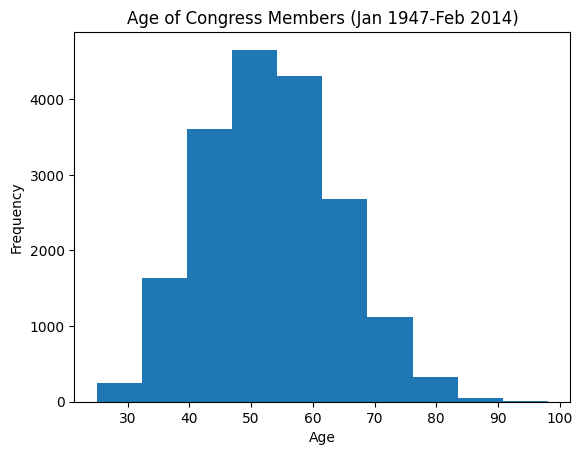

In [ ]:
df["age"].plot.hist()      # creating a histogram to show how many members are each age
plt.title("Age of Congress Members (Jan 1947-Feb 2014)")   # setting title
plt.xlabel("Age")      # labeling x axis
plt.ylabel("Frequency")      # labeling y axis

***Implementation of Congress Resignations Dataset:***
https://github.com/fivethirtyeight/data/tree/master/congress-resignations


This data set provides an overview of all members of congress that resigned and accompanying reasons throughout March 4,1901 to January 15, 2018. This data set is from the Five-Thirty-Eight data. The variables included are the member name, party, district, congress they served on, resignation date, reason why, news source for the information, and a category for each reason. This data set will be referred to as df_dem. The categories are organized as follows:
- X: Unwanted sexual contact
- A: Consensual sex scandals
- B: Other scandals
- C: Other office
- D: Private Sector
- E: Health/Family
- F: Other
- G: Left Early
- H: Military Service
- I: Election overturned.

In [ ]:
path = "/content/drive/MyDrive/CMPS3160Project/congressional_resignations.csv"
df_dem = pd.read_csv(path)      # reading in the new data set

In [ ]:
df

# January 1947 to February 2014

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18630,113,senate,B000243,Max,S.,Baucus,NaN,1937-12-10,MT,D,Yes,2013-01-03,75.1
18631,113,senate,C001099,William,NaN,Cowan,NaN,1965-04-03,MA,D,No,2013-01-03,47.8
18632,113,senate,C001100,Jeffrey,Scott,Chiesa,NaN,1961-06-21,NJ,R,No,2013-01-03,51.5
18633,113,senate,K000148,John,Forbes,Kerry,NaN,1939-12-10,MA,D,Yes,2013-01-03,73.1


In [ ]:
df.dtypes # data types of variables in the congress age dataset

congress        int64
chamber        object
bioguide       object
firstname      object
middlename     object
lastname       object
suffix         object
birthday       object
state          object
party          object
incumbent      object
termstart      object
age           float64
dtype: object

In [ ]:
df_dem

,Member,Party,District,Congress,Resignation Date,Reason,Source,Category
0,Pat Tiberi,R,OH-12,115th,1/15/2018,Took a job with the Ohio Business Roundtable,New York Times,D
1,Al Franken,D,MN-SEN,115th,1/2/2018,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,X
2,Trent Franks,R,AZ-08,115th,12/8/2017,Sexual harassment/surrogacy pressure,CNN,X
3,John Conyers,D,MI-13,115th,12/5/2017,Sexual harassment/inappropriate touching,Washington Post,X
4,Tim Murphy,R,PA-18,115th,10/21/2017,Extramarital affair/abortion hypocrisy,POLITICO,A
...,...,...,...,...,...,...,...,...
610,George Ray,R,NY-26,57th,9/11/1902,Appointed federal judge,U.S. Congress,C
611,James Butler,D,MO-12,57th,6/28/1902,Election declared invalid,U.S. Congress,I
612,William Moody,R,MA-06,57th,5/1/1902,Appointed to Roosevelt administration,U.S. Congress,C
613,John Rhea,D,KY-03,57th,3/25/1902,His election was successfully contested & over...,U.S. Congress,I


In [ ]:
df_dem.dtypes # data types of variables in the congress resignations dataset

Member              object
Party               object
District            object
Congress            object
Resignation Date    object
Reason              object
Source              object
Category            object
dtype: object

***Exploratory Data Analysis:***

Before comparing the two data sets, we will first adjust the age set (df) by combining the firstname and lastname variables into one variable titled "Member" in order to match the resignations set (df_dem).

In [ ]:
# Combine firstname and lastname in df to become Member
df["Member"] = df["firstname"] + " " + df["lastname"]

Now we will dive into our first question: **How do the ages of congress members relate to their respective party?**

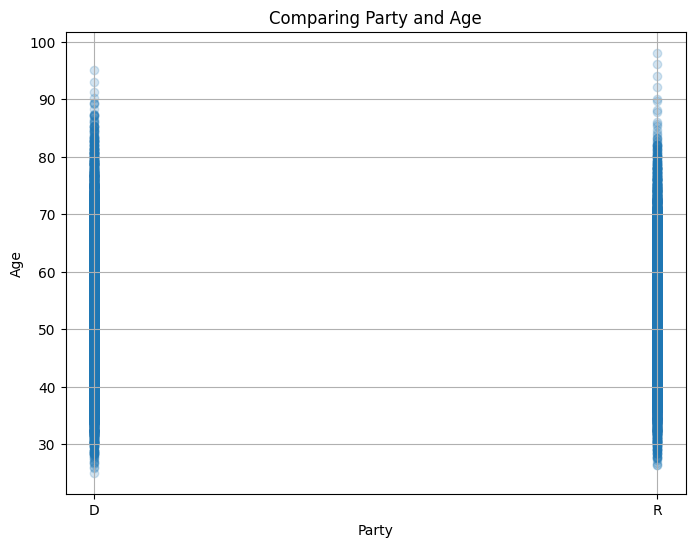

Democratic Party (D) Summary Statistics:
count    10290.000000
mean        53.431467
std         10.979395
min         25.000000
25%         45.300000
50%         52.900000
75%         60.900000
max         95.100000
Name: age, dtype: float64

Republican Party (R) Summary Statistics:
count    8274.000000
mean       53.167041
std        10.296562
min        26.400000
25%        45.600000
50%        53.000000
75%        60.200000
max        98.100000
Name: age, dtype: float64


In [ ]:
# The first graph will compare the ages of members of congress based on their party.

# Mapping party names to numerical values
party_mapping = {'D': 0, 'R': 1}

# Convert party names to numerical values
df['party_numeric'] = df['party'].map(party_mapping)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['party_numeric'], df['age'], alpha=0.2)
plt.xticks([0, 1], ['D', 'R'])  # Set x-axis labels
plt.xlabel('Party')
plt.ylabel('Age')
plt.title('Comparing Party and Age')
plt.grid(True)
plt.show()

# Calculate summary statistics for each party group
dem_stats = df[df['party'] == 'D']['age'].describe()
rep_stats = df[df['party'] == 'R']['age'].describe()
print("Democratic Party (D) Summary Statistics:")
print(dem_stats)
print("\nRepublican Party (R) Summary Statistics:")
print(rep_stats)

There are some observable trends evident in this comparison. Firstly, the youngest members have notably been associated with the Democratic party, while the oldest members, almost ranging to 100, were involved with the Republican party.

Now onto our second question: **How do the average ages of congress members relate to their respective state?**

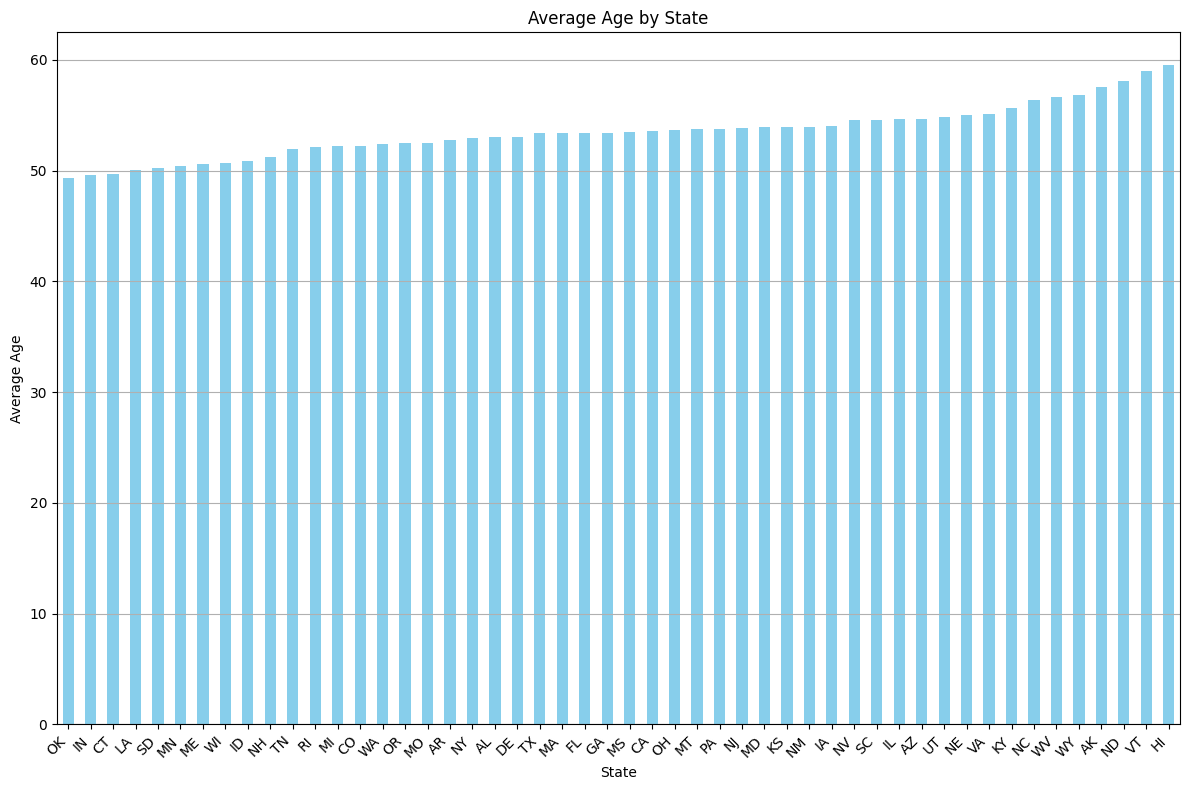

count    50.000000
mean     53.506429
std       2.342875
min      49.375451
25%      52.232101
50%      53.453045
75%      54.650353
max      59.520325
Name: age, dtype: float64

In [ ]:
# This graph will compare the average ages of congress members based on their state.

# Calculate average age by state
avg_age_by_state = df.groupby('state')['age'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 8))
avg_age_by_state.plot(kind='bar', color='skyblue')
plt.title('Average Age by State')
plt.xlabel('State')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
# Calculate summary statistics for average age by state
avg_age_by_state.describe()


This graph shows the average age of congress members based on what state they originated from. On average, the youngest members have come from Oklahoma at an average age of 49.375451, while the oldest members have been from Hawaii at an average age of 59.520325. It is interesting to note that the middle of the graph is almost entirely flat, and includes primarily southern states. This could indicate that geographical location may be connected with likelihood to present an average aged candidate.

Our next question delves deeper into the dataset df_dem and uses inner merge to utilize the Member variable in both data sets: **What implications does the age of congress members have on how long they served before their resignation?**

<ipython-input-14-80327320d27f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Tenure Duration'] = merged_df['Resignation Date'] - merged_df['termstart']


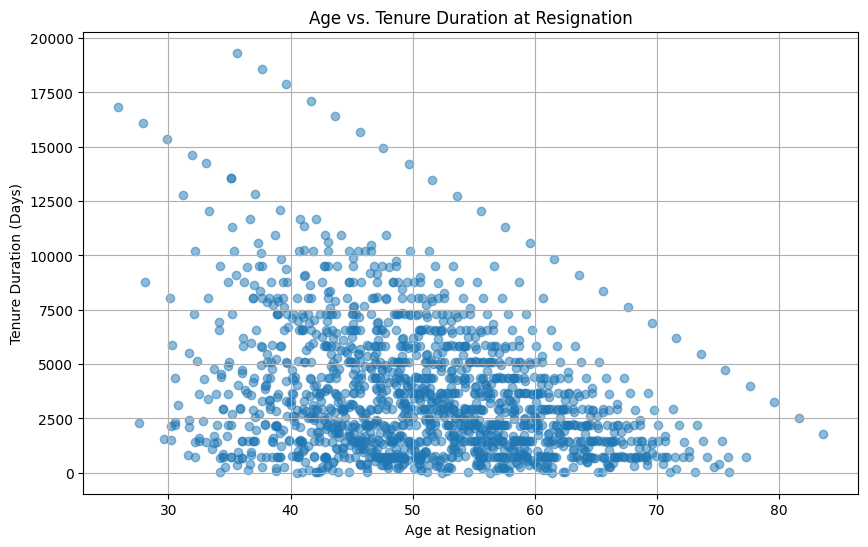

In [ ]:

# Merge the DataFrames on the 'Member' variable
merged_df = pd.merge(df, df_dem, on='Member', how='inner')

# Convert 'termstart' to datetime (year, month, day)
merged_df['termstart'] = pd.to_datetime(merged_df['termstart'])

# Convert 'Resignation Date' to datetime (month, day, year)
merged_df['Resignation Date'] = pd.to_datetime(merged_df['Resignation Date'], format='%m/%d/%Y')

# Filter out rows where resignation date precedes term start date
merged_df = merged_df[merged_df['Resignation Date'] >= merged_df['termstart']]

# Calculate tenure duration
merged_df['Tenure Duration'] = merged_df['Resignation Date'] - merged_df['termstart']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['age'], merged_df['Tenure Duration'].dt.days, alpha=0.5)
plt.title('Age vs. Tenure Duration at Resignation')
plt.xlabel('Age at Resignation')
plt.ylabel('Tenure Duration (Days)')
plt.grid(True)
plt.show()


This graph illustrates the relationship between a congress member's age and how long their tenure was before they resigned. Unsurprisingly, the youngest recorded member had the longest tenure duration. However, the oldest member did not have the shortest. The shortest tenures are concentrated mostly around the average age of the resigned members which is 51. To further illustrate the trends, we can take a loot at the summary statistics of both the age category, and the tenure duration category.

In [ ]:
merged_df[['age', 'Tenure Duration']].describe()

,age,Tenure Duration
count,1570.000000,1570
mean,51.028535,3540 days 08:12:32.101910848
std,9.437437,2881 days 04:06:55.259180256
min,25.900000,0 days 00:00:00
25%,44.100000,1440 days 00:00:00
50%,50.700000,2905 days 12:00:00
75%,57.600000,5109 days 00:00:00
max,83.600000,19328 days 00:00:00


For our next question: **How many congress members from each party have resigned over time?**

<Figure size 1000x600 with 0 Axes>

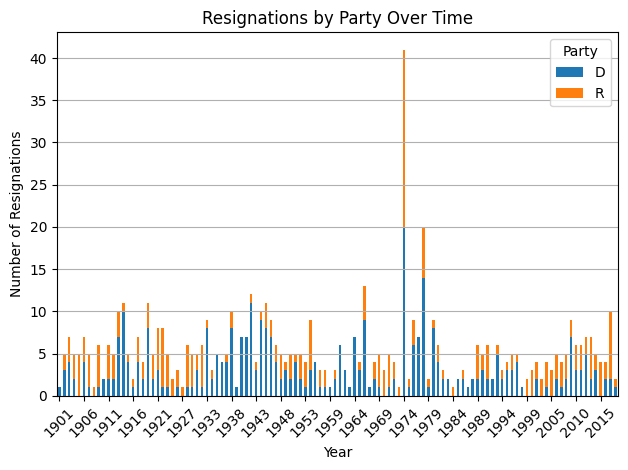

In [ ]:
# Convert 'Resignation Date' to datetime
df_dem['Resignation Date'] = pd.to_datetime(df_dem['Resignation Date'], format='%m/%d/%Y')

# Group by party and year, and count resignations
resignations_by_party_year = df_dem.groupby([df_dem['Resignation Date'].dt.year, 'Party']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
resignations_by_party_year.plot(kind='bar', stacked=True)
plt.title('Resignations by Party Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Resignations')
plt.legend(title='Party')
plt.grid(axis='y')

plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees

# Set the frequency of x-axis tick labels to every 5 years
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))

plt.tight_layout()
plt.show()

There was a significant spike in resignations for both democrats and republicans in the year 1974. This statistic really stand out on the graph, and will be interesting to explore more. Based on the visual, there have been more democratic members who have resigned than republican. To further illustrate the apparent trends, we can take a look at the summary statistics of both the total resignations by party, and the total resignations from each year.

In [ ]:
# Total resignations by party
total_resignations_by_party = df_dem['Party'].value_counts()

# Total resignations over the years
total_resignations_over_years = df_dem['Resignation Date'].dt.year.value_counts().sort_index()

# Summary statistics
summary_stats = pd.DataFrame({
    'Total Resignations by Party': total_resignations_by_party,
    'Total Resignations Over the Years': total_resignations_over_years
})

print(summary_stats)
print(summary_stats.min())
print(summary_stats.max())


      Total Resignations by Party  Total Resignations Over the Years
D                           357.0                                NaN
R                           258.0                                NaN
1901                          NaN                                1.0
1902                          NaN                                5.0
1903                          NaN                                7.0
...                           ...                                ...
2014                          NaN                                5.0
2015                          NaN                                4.0
2016                          NaN                                4.0
2017                          NaN                               10.0
2018                          NaN                                2.0

[116 rows x 2 columns]
Total Resignations by Party          258.0
Total Resignations Over the Years      1.0
dtype: float64
Total Resignations by Party          357.0
Tota

As outlined before, there have been more democratic resignations than republican. Additionally, the least amount of resignations in one year was 1, indicating that during the recorded time period, a full year did not go by without a congress member resigning. The most resignations in one year was 41, having occurred in 1974.

We can easily illustrate this even further.

<ipython-input-18-ba41b6caa118>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Party', data=df_dem, palette='Set1', order=df_dem['Party'].value_counts().index)


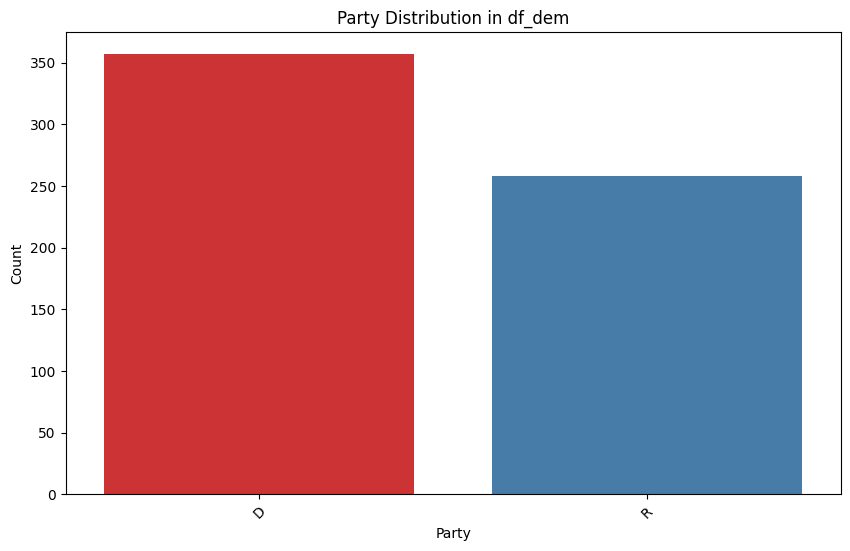

In [ ]:
#Party Representation
plt.figure(figsize=(10, 6))
sns.countplot(x='Party', data=df_dem, palette='Set1', order=df_dem['Party'].value_counts().index)
plt.title('Party Distribution in df_dem')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Now for another question: **Does the number of congressional districts in each state relate to the number of resignations from them?**

<ipython-input-19-6f91514862e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='state', data=df, palette='Set2', order=df['state'].value_counts().index)


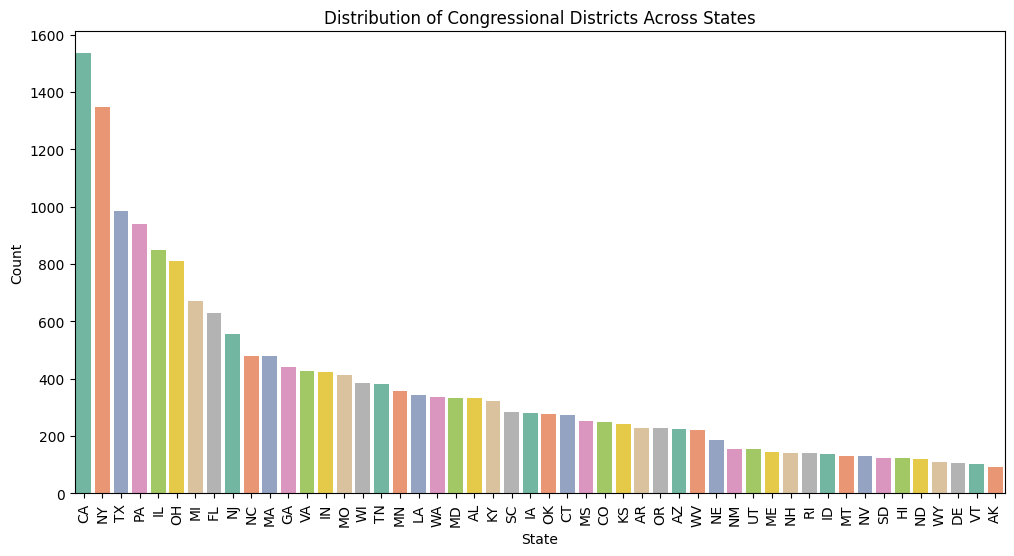

count      50.000000
mean      372.700000
std       311.451195
min        92.000000
25%       148.000000
50%       279.500000
75%       427.000000
max      1534.000000
Name: count, dtype: float64

In [ ]:
#Geographic Representation
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=df, palette='Set2', order=df['state'].value_counts().index)
plt.title('Distribution of Congressional Districts Across States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Calculate count of congressional districts by state
districts_count_by_state = df['state'].value_counts()

# Calculate summary statistics for count of congressional districts by state
districts_count_by_state.describe()


This graph shows how many different congressional districts exist in each state. As is clear, California has the most by far (1534), and Arkansas has the least (92). Similarly to when looking at the number of congress members from each state, the data for the southern states is all relatively similar and significantly evens out the curve of the chart.

***Implementing our Model:***

We plan to build a k nearest neighbors regression model to predict the age of Congress members based on their party affiliation and state. The model will help us understand if there are significant differences in the ages of Congress members between parties and across states.

*Variables:*

Target Variable: Age

Predictor Variables: Party (Democratic or Republican), State

Objective:
To determine if party affiliation and state have a statistically significant impact on the age of Congress members.

*Analysis Steps:*

Data Preprocessing: Merge df and df_dem DataFrames on congress to combine relevant variables.


Data Exploration: Explore the relationship between age, party, and state using visualizations.

Model Building: Build a regression model using age as the target variable and party affiliation and state as predictor variables.

Model Evaluation: Evaluate the model's performance using metrics like RMSE and MAE.

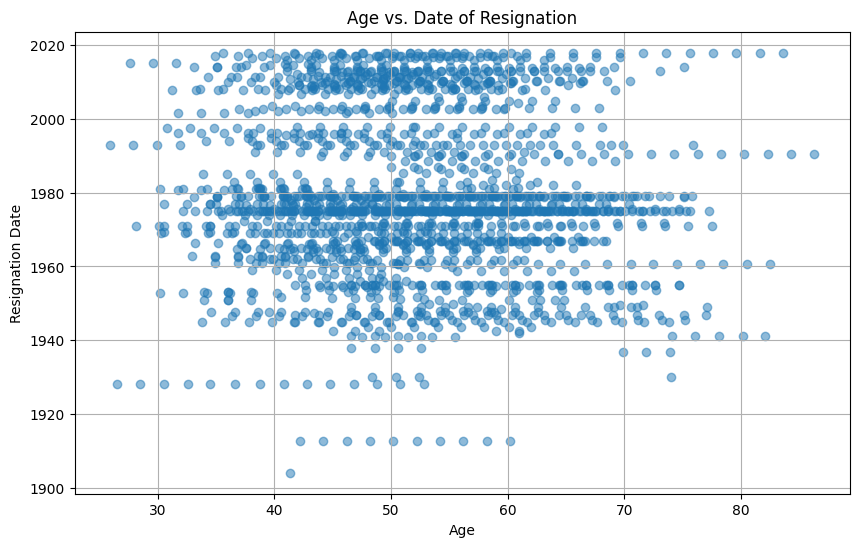

In [ ]:

# Merge the DataFrames on the 'Member' variable
new_df = pd.merge(df, df_dem, on='Member', how='inner')

# Convert 'termstart' to datetime (year, month, day)
new_df['termstart'] = pd.to_datetime(new_df['termstart'])

# Convert 'Resignation Date' to datetime (month, day, year)
new_df['Resignation Date'] = pd.to_datetime(new_df['Resignation Date'], format='%m/%d/%Y')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(new_df['age'], new_df['Resignation Date'], alpha=0.5)
plt.title('Age vs. Date of Resignation')
plt.xlabel('Age')
plt.ylabel('Resignation Date')
plt.grid(True)
plt.show()


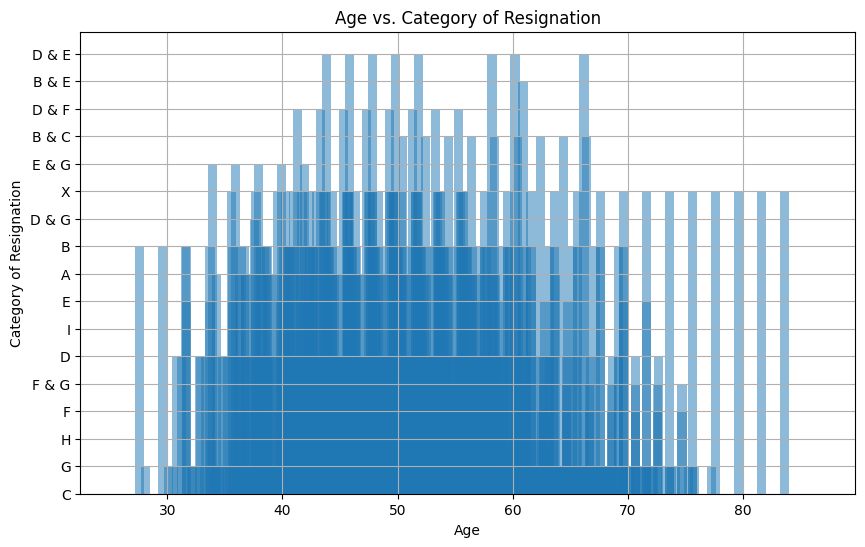

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(new_df['age'], new_df['Category'], alpha=0.5)
plt.title('Age vs. Category of Resignation')
plt.xlabel('Age')
plt.ylabel('Category of Resignation')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Merge the DataFrames on the 'Member' variable
# Merge the DataFrames using an inner join
new_df = pd.merge(df, df_dem, on='Member', how='inner')

# Select predictor variables and target variable
X = new_df[['party', 'state']]
y = new_df['age']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the KNN regression model
k = 5  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the age on the testing set
y_pred = knn.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Optionally, you can add the corresponding feature values from X_test to the DataFrame
results = pd.concat([results, X_test.reset_index(drop=True)], axis=1)

print(results)

RMSE: 10.09627010460739
MAE: 8.334005037783376
      Actual  Predicted party_I party_R state_AL state_AR state_AZ state_CA  \
582     43.1      42.50     NaN     NaN      NaN      NaN      NaN      NaN   
1711    62.3      45.72     NaN     NaN      NaN      NaN      NaN      NaN   
1052    44.7      54.48     NaN     NaN      NaN      NaN      NaN      NaN   
1075    43.7      55.14     NaN     NaN      NaN      NaN      NaN      NaN   
917     60.5      50.98     NaN     NaN      NaN      NaN      NaN      NaN   
...      ...        ...     ...     ...      ...      ...      ...      ...   
390      NaN        NaN   False   False    False    False    False    False   
391      NaN        NaN   False   False    False    False    False    False   
392      NaN        NaN   False   False     True    False    False    False   
395      NaN        NaN   False    True    False    False    False    False   
396      NaN        NaN   False   False    False    False    False    False   

    

As we can see from the results of the model, both the RMSE and MAE are relatively low, but also could be better. This indiciates that we need to work on more accurately fitting our model to the data to ensure less room for error, while also ensuring that we do not overfit and cause incorrect predictions.

Additionally, while the results are slightly cluttered due to more members being logged in the original data frame than the resignation one, it can be observed that the model is effectively predicting whether or not the members included in both data sets would be in a certain party or from a certain state based on the results of the age model.

Through this project and the accompanying K-Nearest Neighbors model, we have analyzed the correlation between the age, party, and state of congress members and the likelihood that they may resign for any specific reason. This information could inform officials on the current patterns they follow when selecting their representatives, and how they might shift these patterns in order to prevent the more easily avoidable reasons for resignation that arise in certain age groups. There are a lot of directions and contexts we may continue to explore this research in, and many applicable actions that may be taken based off our results.